In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("cleaned_data.csv")

In [4]:
df.head()

,URLs,isPhishing,RawLength,largestWord,avgWord,smallestWord,SDlength,HTTPS,WWW,.COM,...,tld,Alexa_top_1m,underscore,equal,ampersand,question,at,dash,dot,slash
0,13bmosecure.com,1,15,11,7,3,5.656854,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,34zy2.sljtm.com,1,15,5,4,3,1.154701,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,accountverification.online,1,26,19,12,6,9.192388,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,apaypal.co/Secure/PP/Paypal/,1,28,7,5,2,2.408319,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,app-findmyiphone.com,1,20,12,6,3,5.196152,0,0,1,...,1,0,0,0,0,0,0,1,1,0


#### Let us find out if their is any null values in our prepared dataset

In [5]:
df.isna().sum()

URLs              0
isPhishing        0
RawLength         0
largestWord       0
avgWord           0
smallestWord      0
SDlength          0
HTTPS             0
WWW               0
.COM              0
subdomainLen      0
domainLen         0
countSubDomain    0
countDigitDom     0
countDigitSub     0
brandName         0
countBrand        0
keywordCount      0
tld               0
Alexa_top_1m      0
underscore        0
equal             0
ampersand         0
question          0
at                0
dash              0
dot               0
slash             0
dtype: int64

#### Statistical Analysis on the dataset

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
isPhishing,54763.0,0.453828,0.497868,0.000000,0.00000,0.000000,1.00000,1.000000
RawLength,54763.0,67.596571,51.129908,9.000000,43.00000,56.000000,75.00000,3992.000000
largestWord,54763.0,15.319577,18.379375,4.000000,9.00000,12.000000,16.00000,1070.000000
avgWord,54763.0,6.195789,2.670164,2.000000,5.00000,6.000000,7.00000,95.000000
smallestWord,54763.0,2.340394,0.683372,1.000000,2.00000,2.000000,3.00000,7.000000
SDlength,54763.0,4.412953,5.900174,0.632456,2.44949,3.233751,4.70562,307.046586
HTTPS,54763.0,0.206636,0.404896,0.000000,0.00000,0.000000,0.00000,1.000000
WWW,54763.0,0.447565,0.497248,0.000000,0.00000,0.000000,1.00000,1.000000
.COM,54763.0,0.682030,0.465692,0.000000,0.00000,1.000000,1.00000,1.000000
subdomainLen,54763.0,2.895020,5.516366,0.000000,0.00000,3.000000,3.00000,222.000000


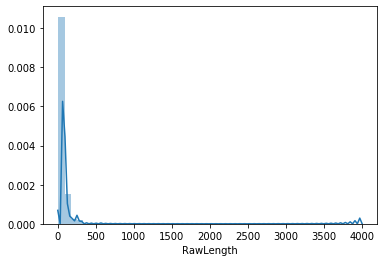

In [7]:
sns.distplot(df['RawLength'])

In [8]:
df_new = df[df.RawLength <= 300]
len(df_new)/len(df)

0.9964392016507496

#### Since, there are very few urls greater than 300, let us analyse the urls with length less than 300

In [9]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
isPhishing,54568.0,0.451913,0.497687,0.000000,0.000000,0.000000,1.000000,1.000000
RawLength,54568.0,66.330175,40.465790,9.000000,43.000000,56.000000,75.000000,300.000000
largestWord,54568.0,15.011399,14.681062,4.000000,9.000000,12.000000,16.000000,208.000000
avgWord,54568.0,6.156026,2.335526,2.000000,5.000000,6.000000,7.000000,40.000000
smallestWord,54568.0,2.343333,0.681412,1.000000,2.000000,2.000000,3.000000,7.000000
SDlength,54568.0,4.324844,4.836692,0.632456,2.445842,3.226564,4.676181,76.761536
HTTPS,54568.0,0.207356,0.405416,0.000000,0.000000,0.000000,0.000000,1.000000
WWW,54568.0,0.447937,0.497287,0.000000,0.000000,0.000000,1.000000,1.000000
.COM,54568.0,0.681462,0.465914,0.000000,0.000000,1.000000,1.000000,1.000000
subdomainLen,54568.0,2.887278,5.421105,0.000000,0.000000,3.000000,3.000000,222.000000


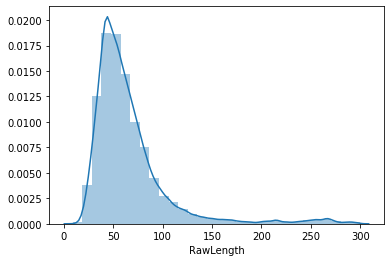

In [10]:
sns.distplot(df_new['RawLength'], bins = 30)

### Let us see the distribution of Phishing V/S Non-Phishing URLS

In [11]:
df.isPhishing.value_counts()

0    29910
1    24853
Name: isPhishing, dtype: int64

In [12]:
(df.isPhishing.value_counts()/len(df))*100

0    54.617169
1    45.382831
Name: isPhishing, dtype: float64

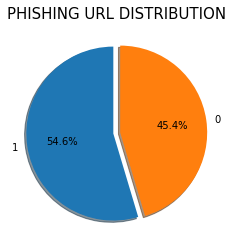

In [13]:
isPhishing = df['isPhishing'].value_counts()
labels = df.isPhishing.unique()
plt.pie(isPhishing,labels=labels,autopct="%1.1f%%",shadow=True,explode=(0.04,0.04),startangle=90)
plt.title('PHISHING URL DISTRIBUTION',fontsize=15)
plt.show()

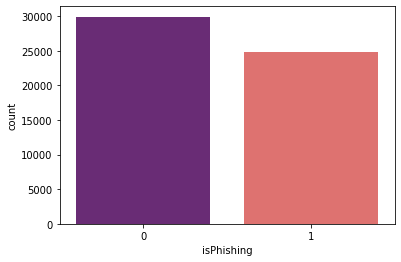

In [14]:
sns.countplot(x='isPhishing', data=df, palette = 'magma')

### Heatmap for our  data to find the correlation between length of word and Phishing URL

In [15]:
word_count = df.filter(['largestWord', 'smallestWord', 'avgWord', 'isPhishing', 'SDlength'], axis = 1)
word_count.corr()

,largestWord,smallestWord,avgWord,isPhishing,SDlength
largestWord,1.000000,-0.003353,0.898219,0.222350,0.986028
smallestWord,-0.003353,1.000000,0.145492,-0.112648,0.019200
avgWord,0.898219,0.145492,1.000000,0.213462,0.917836
isPhishing,0.222350,-0.112648,0.213462,1.000000,0.220580
SDlength,0.986028,0.019200,0.917836,0.220580,1.000000


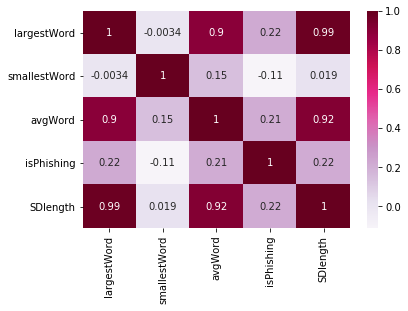

In [16]:
sns.heatmap(word_count.corr(), cmap = 'PuRd', annot = True)

### Let us analyse the distribution of top level domains in phishing urls

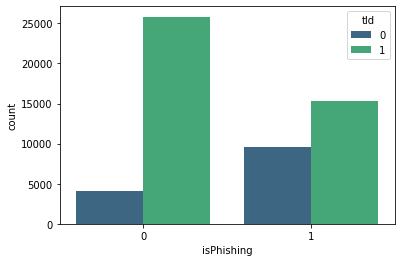

In [17]:
sns.countplot(x="isPhishing", data=df,hue = 'tld', palette='viridis')

#### We can see that a majority of the Phishing sites have a top level domain in their url

### Let us see the relation between Secured Sites (HTTPS Enabled) and Phishing URLs

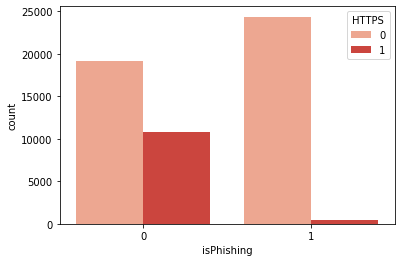

In [18]:
sns.countplot(x="isPhishing", data=df,hue = 'HTTPS', palette='Reds')

#### Therefore we can see that most Phishing urls don't have HTTPs

### Let us see the relation between 'www' and Phishing URLs


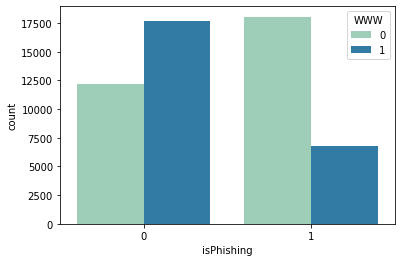

In [19]:
sns.countplot(x="isPhishing", data=df,hue = 'WWW', palette='YlGnBu')

#### Therefore we can see that most Phishing urls don't have 'www'

### Let us see the relation between '.com' and Phishing URLs


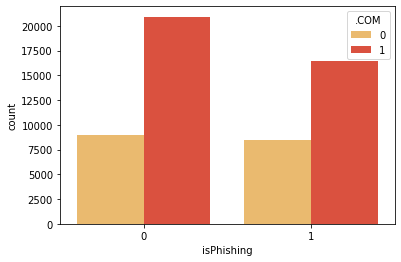

In [20]:
sns.countplot(x="isPhishing", data=df,hue = '.COM', palette='YlOrRd')

#### Therefore we can see that a majority of Phishing urls have '.com'

### Now, let us analyse the relation between brand name and phishing urls

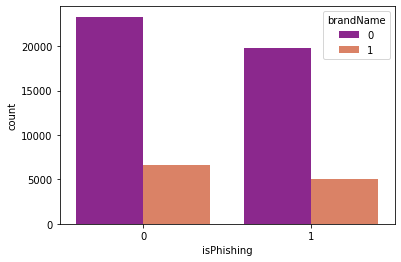

In [21]:
sns.countplot(x="isPhishing", data=df,hue = 'brandName', palette='plasma')

#### It is observed that a majority of Phishing URLs do not have a brandname in it.

### Let us see if secured sites have any relation with the domain length

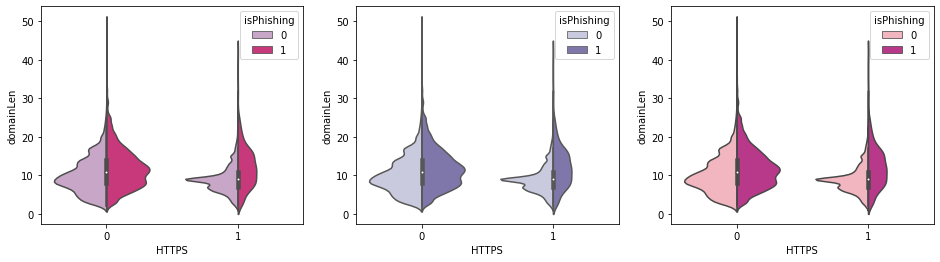

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(16,4))
sns.violinplot(x="HTTPS", y='domainLen', data=df,hue='isPhishing',split=True,palette='PuRd', ax = ax[0])
sns.violinplot(x="HTTPS", y='domainLen', data=df,hue='isPhishing',split = True, 
               palette='Purples', ax = ax[1])
sns.violinplot(x="HTTPS", y='domainLen', data=df,hue='isPhishing',split = True, 
               palette='RdPu', ax = ax[2])

### Now, let us find the correlation between special characters and Phishing URLs and draw a heatmap

In [23]:
special_char = df.filter(['underscore', 'dash', 'equal', 'slash', 'at', 'ampersand', 'question', 'isPhishing'], axis = 1)
special_char.corr()

,underscore,dash,equal,slash,at,ampersand,question,isPhishing
underscore,1.000000,-0.002702,1.000000,0.013393,0.407164,0.643480,0.911837,0.249945
dash,-0.002702,1.000000,-0.002702,-0.009054,0.006085,0.038778,-0.018298,-0.178032
equal,1.000000,-0.002702,1.000000,0.013393,0.407164,0.643480,0.911837,0.249945
slash,0.013393,-0.009054,0.013393,1.000000,0.005901,0.008802,0.013619,-0.040626
at,0.407164,0.006085,0.407164,0.005901,1.000000,0.197186,0.412971,0.173623
ampersand,0.643480,0.038778,0.643480,0.008802,0.197186,1.000000,0.632241,0.211493
question,0.911837,-0.018298,0.911837,0.013619,0.412971,0.632241,1.000000,0.256475
isPhishing,0.249945,-0.178032,0.249945,-0.040626,0.173623,0.211493,0.256475,1.000000


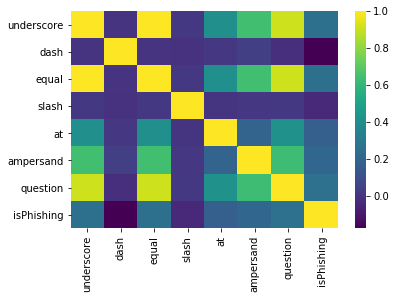

In [24]:
sns.heatmap(special_char.corr(), cmap = 'viridis')

### Let us see if 'http', 'www', '.com' , count of keywords, presence of a top level domain and phishing sites are correlated

In [25]:
urltype = df.filter(['HTTPS', 'WWW', '.COM', 'brandName', 'isPhishing', 'keywordCount','tld'], axis = 1)
urltype.corr()

,HTTPS,WWW,.COM,brandName,isPhishing,keywordCount,tld
HTTPS,1.000000,0.073499,0.020449,0.220927,-0.419553,-0.126599,0.193444
WWW,0.073499,1.000000,0.150655,-0.083699,-0.318677,-0.024269,0.153568
.COM,0.020449,0.150655,1.000000,0.005254,-0.041466,0.271680,0.532751
brandName,0.220927,-0.083699,0.005254,1.000000,-0.020883,0.007188,0.051035
isPhishing,-0.419553,-0.318677,-0.041466,-0.020883,1.000000,0.248054,-0.284600
keywordCount,-0.126599,-0.024269,0.271680,0.007188,0.248054,1.000000,0.049654
tld,0.193444,0.153568,0.532751,0.051035,-0.284600,0.049654,1.000000


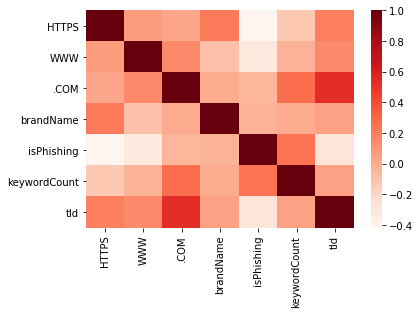

In [26]:
sns.heatmap(urltype.corr(), cmap = 'Reds')

### Now let us examine the relation between domain length and raw length

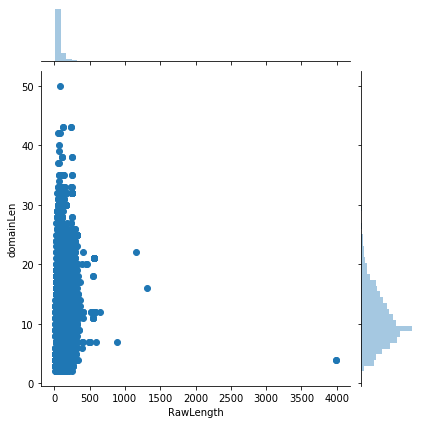

In [27]:
sns.jointplot(x='RawLength',y='domainLen',data=df,kind='scatter')